# Part 1：Python Basics with Numpy (optional assignment)
## 1 - Building basic functions with numpy

Numpy is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp()
**Exercise:** Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder:** 
sigmoid(x)=11+e−xsigmoid(x)=11+e−x is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

![13](../images/13.png)

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [1]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0/(1 + 1/math.exp(x))
    ### END CODE HERE ###

    return s

In [2]:
basic_sigmoid(3)

0.9525741268224334

Actually, we rarely use the “math” library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful.


In [3]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: must be real number, not list

In fact, if x=(x1,x2,...,xn)x=(x1,x2,...,xn) is a row vector then np.exp(x)np.exp(x) will apply the exponential function to every element of x. The output will thus be: np.exp(x)=(ex1,ex2,...,exn)


In [4]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))


[ 2.71828183  7.3890561  20.08553692]


Furthermore, if x is a vector, then a Python operation such as s=x+3s=x+3 or s=1xs=1x will output s as a vector of the same size as x.


In [5]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


Exercise: Implement the sigmoid function using numpy.

Instructions: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices…) are called numpy arrays. You don’t need to know more for now. 

For 
$x \in \mathbb{R}^n sigmoid(x) = sigmoid\begin{pmatrix} x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}\frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}
$

In [7]:
# GRADED FUNCTION: sigmoid

import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0 / (1 + 1 / np.exp(x))
    ### END CODE HERE ###

    return s

In [8]:
x = np.array([1,2,3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

### 1.2 - Sigmoid gradient
**Exercise:** Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is:

$sigmoid_derivative(x)=σ′(x)=σ(x)(1−σ(x))$

You often code this function in two steps: 
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful. 
2. Compute σ′(x)=s(1−s)

In [9]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    s = 1.0 / (1 + 1 / np.exp(x))
    ds = s * (1 - s)
    ### END CODE HERE ###

    return ds

In [10]:
x = np.array([1,2,3])
print('sigmoid_derivative(x)= '+ str(sigmoid_derivative(x)))

sigmoid_derivative(x)= [0.19661193 0.10499359 0.04517666]


### 1.3 - Reshaping arrays
Two common numpy functions used in deep learning are np.shape and np.reshape(). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(…) is used to reshape X into some other dimension.

For example, in computer science, an image is represented by a 3D array of shape $(length,height,depth=3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length∗height∗3,1)$. In other words, you “unroll”, or reshape, the 3D array into a 1D vector.
![14](../images/14.png)

**Exercise:** Implement image2vector() that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:

In [14]:
v = v.reshape((v.shape[0]*v.shape[1],v.shape[2]))

NameError: name 'v' is not defined

In [15]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    ### END CODE HERE ###

    return v

In [16]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### 1.4 - Normalizing rows
Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to x‖x‖x‖x‖ (dividing each row vector of x by its norm).

For example, if
$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$
then
$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4}$
and
$x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$
Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you’re going to learn about it in part 5.


**Exercise:** Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [17]:
# GRADED FUNCTION: normalizeRows

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).

    Argument:
    x -- A numpy matrix of shape (n, m)

    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, axis=1, keepdims = True)  #计算每一行的长度，得到一个列向量

    # Divide x by its norm.
    x = x / x_norm  #利用numpy的广播，用矩阵与列向量相除。
    ### END CODE HERE ###

    return x

In [18]:
x = np.array([
    [0, 3, 4],
    [1,6,4]
])
print('normalizeRows(x)=' + str(normalizeRows(x)))

normalizeRows(x)=[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


**Note:**
In normalizeRows(), you can try to print the shapes of x_norm and x, and then rerun the assessment. You’ll find out that they have different shapes. This is normal given that x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column. So how did it work when you divided x by x_norm? This is called broadcasting and we’ll talk about it now!


### 1.5 - Broadcasting and the softmax function
A very important concept to understand in numpy is “broadcasting”. It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official broadcasting documentation.

**Exercise:** Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about softmax in the second course of this specialization.

Instructions: 
$\text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}  
    x_1  &&  
    x_2 &&  
    …  &&  
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix}$

$\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: } \\softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\\frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} \\= \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix}$

In [19]:
# softmax

def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis = 1, keepdims = True) 
    s = x_exp / x_sum
    return s

In [21]:
x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print('softmax(x) = '+ str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


#### note:
需要记住的是：
+ np.exp(x)
+ the sigmoid 函数和它的梯度函数
+ image2vector 通常使用在深度学习中
+ np.reshape 被广泛的应用
+ numpy在创建函数上有很高的效率
+ 广播

## 向量化



In [22]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot += x1[i]*x2[i]
toc = time.process_time()
print('dot='+str(dot)+'\n----Computation time = '+ str(1000*(toc-tic)) + 'ms')



#  
tic = time.process_time()
outer = np.zeros((len(x1),len(x2)))   # 初始化一个乘出来的矩阵
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print('outer='+str(outer)+'\n----Computation time = '+ str(1000*(toc-tic)) + 'ms')


tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print('mul='+str(mul)+'\n----Computation time = '+ str(1000*(toc-tic)) + 'ms')



W = np.random.rand(3, len(x1))    #  随机化 3 * len(x1)大小的numpy矩阵
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print('gdot='+str(gdot)+'\n----Computation time = '+ str(1000*(toc-tic)) + 'ms')


dot=278
----Computation time = 0.15400000000020952ms
outer=[[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [24]:
W.shape[0]

3

In [26]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

tic = time.process_time()
dot = np.dot(x1, x2)
toc = time.process_time()
print('dot= '+ str(dot) + '\n……Computation time='+str(1000*(toc - tic)) + 'ms')



tic = time.process_time()
outer = np.outer(x1, x2)
toc = time.process_time()
print('outer='+str(outer) + '\n……Computation time='+str(1000*(toc - tic))+ 'ms')


tic = time.process_time()
mul = np.multiply(x1, x2)
toc = time.process_time()
print('elementwise multuplucation='+str(mul) + '\n……Computation time='+str(1000*(toc - tic))+'ms')



tic = time.process_time()
dot = np.dot(W, x1)
toc = time.process_time()
print('gdot='+str(dot) + '\n……Computation time='+str(1000*(toc- tic))+'ms')


dot= 278
……Computation time=0.140000000000029ms
outer=[[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
……Computation time=0.15399999999976544ms
elementwise multuplucation=[81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
……Computation time=0.10999999999983245ms
gdot=[20.92691161 21.69211408 25.71818309]
……Computation time=0.11599

In [28]:
def L1(yhat, y):
    loss = np.sum(np.abs(y - yhat))
    return loss

In [29]:
yhat = np.array([.9,0.2,0.1,.4,.9])
y = np.array([1,0,0,1,1])
print('L1='+str(L1(yhat,y)))

L1=1.1


In [30]:
def L2(yhat, y):
    loss = np.sum(np.power((y-yhat),2))
    return loss

In [31]:
yhat = np.array([.9, 0.2, 0.1, .4,.9])
y = np.array([1,0,0,1,1])
print('L2 = '+ str(L2(yhat, y)))

L2 = 0.43


需要记住的是：
+ 向量化
+ L1 L2范数
+ numpy函数  np.sum   np.abs  np.dot  np.multiply  np.maximum etc.

# Part 2： Logistic Regression with a Neural Network mindset
You will learn to: 
- Build the general architecture of a learning algorithm, including: 
- Initializing parameters 
- Calculating the cost function and its gradient 
- Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [38]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

**数据集：**
+ m_train 训练集
+ m_test 测试集
+ the shape of each image (num_px,num_px,3)  3 channels(RGB)
    height = num_px   weight = num_px


'-orig'代表预处理   每一个train_set_x_orig都代表一个图像数组

y = [1],it's a cat  picture.


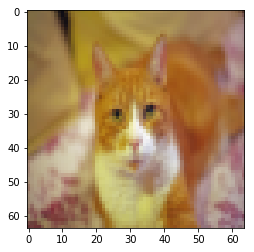

In [48]:
index = 24
plt.imshow(train_set_x_orig[index])
print('y = '
      + str(train_set_y[:, index]) 
      + ',it\'s a ' 
      + classes[np.squeeze(train_set_y[:, index])].decode('utf-8')
      + '  picture.')

练习

其中
train_set_x_orig 是一个numpy-array shape is （m_shape,num_px, num_px,3)



In [49]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print('Number of training examples: m_train = '+ str(m_train))
print('Number of testing examples: m_test = '+ str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [60]:
X = np.ones(27)
X = X.reshape((3,3,3))
X.shape[0]


3

In [61]:
X_flatten = X.reshape(X.shape[0],-1).T
X_flatten.shape

(9, 3)

为了方便， 我们可以reshape图像 (num_px,num_px,3)   to  (num_px*num_px*3,1)
因此   数据集的列所代表的就是一个  展开的图像

In [53]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [62]:
train_set_x_flatten.shape

(12288, 209)

标准化数据集

In [63]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

**需要记住**
+ 维度   和  表示图像数据的shape
+ reshape数据集
+ 标准化数据集

## 算法结构

逻辑回归实际上是一个非常简单的神经网络
![15](../images/15.png)

In [64]:
def sigmoid(z):
    s = 1.0/(1 + np.exp(-z))
    return s

In [65]:
print('sigmoid([0, 2]) = ' + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [66]:
#   初始化参数
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [67]:
dim = 2
w, b = initialize_with_zeros(dim)
print('w = '+ str(w))
print('b = '+ str(b))

w = [[0.]
 [0.]]
b = 0


In [68]:
#  前向传播
def propagate(w, b, X, Y):
    """
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    """
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1.0/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    dw = (1.0/m)*np.dot(X,(A-Y).T)
    db = (1.0/m)*np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    # squeeze()函数将表示向量的数组转换为秩为1的数组,这样利用matplotlib库函数画图时,就可以正常的显示结果了。
    assert(cost.shape == ())
    
    grads = {"dw":dw,
            "db":db}
    return grads, cost

In [69]:
w, b, X, Y = np.array([[1.],[2.]]), 2.,np.array([[1.,2.,-1.],[3.,4.,-3.2]]),np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [72]:
b

2.0

优化

In [73]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i:%f' % (i,cost))
            
    params = {"w":w,
              "b":b}
    grads = {"dw":dw,
              "db":db}
    
    return params, grads, costs

In [74]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False)


print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


## 预测

In [78]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w =  w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
            
        else:
            Y_prediction[0,i] = 0
            
    assert(Y_prediction.shape == (1,m))
    return Y_prediction

In [79]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**note:**
+ 初始化(w, b)
+ 优化损失函数更新（w,b）
+ 计算损失函数和梯度
+ 更新参数
+ 用学习到的(w, b) 预测样本

## 合并所有函数

In [81]:
train_set_x.shape[0]

12288

In [83]:

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train,Y_train, num_iterations,learning_rate,print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [84]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0:0.693147
Cost after iteration 100:0.584508
Cost after iteration 200:0.466949
Cost after iteration 300:0.376007
Cost after iteration 400:0.331463
Cost after iteration 500:0.303273
Cost after iteration 600:0.279880
Cost after iteration 700:0.260042
Cost after iteration 800:0.242941
Cost after iteration 900:0.228004
Cost after iteration 1000:0.214820
Cost after iteration 1100:0.203078
Cost after iteration 1200:0.192544
Cost after iteration 1300:0.183033
Cost after iteration 1400:0.174399
Cost after iteration 1500:0.166521
Cost after iteration 1600:0.159305
Cost after iteration 1700:0.152667
Cost after iteration 1800:0.146542
Cost after iteration 1900:0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


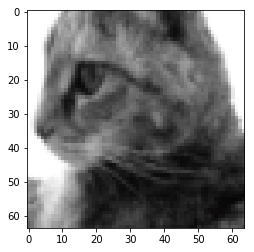

In [97]:
# Example of a picture that was wrongly classified.
index = 23
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " 
       + str(test_set_y[0,index]) 
       + ", you predicted that it is a \"" 
       + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") 
       +  "\" picture.")

In [92]:
test_set_x.shape

(12288, 50)

In [96]:
d["Y_prediction_test"][0,index]

1.0

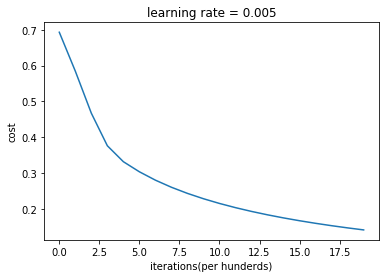

In [100]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hunderds)')
plt.title('learning rate = ' + str(d['learning_rate']))
plt.show()

## 进一步分析并优化


learning rate is: 0.004
train accuracy: 97.12918660287082 %
test accuracy: 70.0 %

------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

------------------------------------



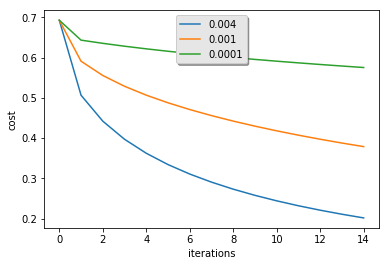

In [107]:
# 选择一个更好的学习率
learning_rates = [0.004, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print('learning rate is: ' + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y,num_iterations = 1500, learning_rate = i, print_cost = False)
    print('\n' + '------------------------------------'+ '\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

/Users/cristalyin/miniconda3/envs/gluon/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cristalyin/miniconda3/envs/gluon/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


y=1.0,your algorithm predicts a "cat"picture.


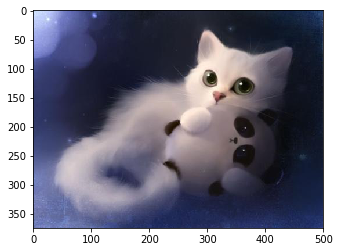

In [110]:
my_image = 'cat.jpg'
fname = '../images/' + my_image
image = np.array(ndimage.imread(fname, flatten = False))
my_image = scipy.misc.imresize(image, size = (num_px, num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"],d["b"], my_image)

plt.imshow(image)
print('y='+ str(np.squeeze(my_predicted_image)) + ',your algorithm predicts a \"'+ classes[int(np.squeeze(my_predicted_image)),].decode('utf-8')+'\"picture.')

**note：**
+ 预处理数据集
+ 初始化、前向传播 、优化 分开
+ 微调学习率